In [1]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas
from sklearn.model_selection import train_test_split
import numpy

import numpy as np #Linear Algebra
import pandas as pd #Data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score

import numpy as np
import pandas as pd
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import matplotlib

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
 
import string
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

from textblob import TextBlob

#Input data files are available in the "../input/" directory.
#For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#To print mulitple statements in single command 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
dfc = pd.read_excel('C:\\Reva\\BA06\\2nd Year\\capstone_project\\credit card recommadation\\dataset\\export_User_Comments_Polarity_Category.xlsx')
dfc = dfc[dfc['Polarity_type'] != 'Neutral']

In [4]:
dfc.columns
dfc.info()
dfc.shape

Index(['Polarity', 'UserComments', 'Polarity_type'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2316 entries, 0 to 5140
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Polarity       2316 non-null   float64
 1   UserComments   2316 non-null   object 
 2   Polarity_type  2316 non-null   object 
dtypes: float64(1), object(2)
memory usage: 72.4+ KB


(2316, 3)

<Figure size 720x720 with 0 Axes>

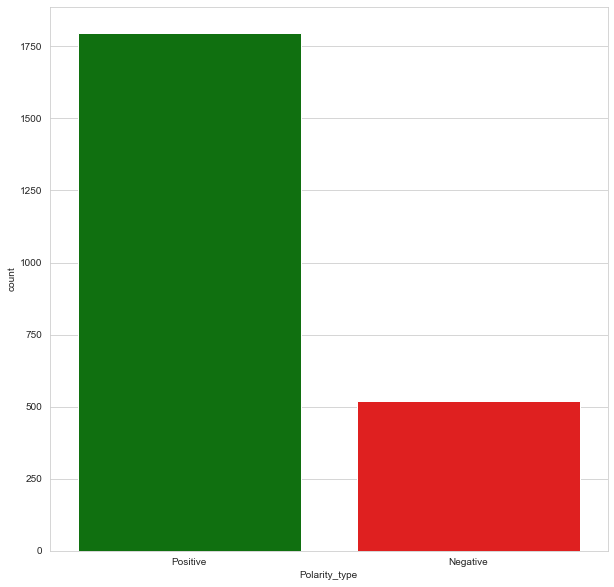

In [5]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Polarity_type", data=dfc, 
                  palette=dict(Neutral="blue", Positive="green", Negative="red"))

<AxesSubplot:ylabel='Polarity_type'>

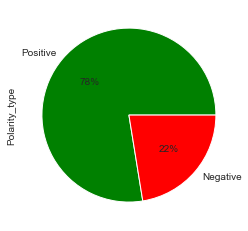

In [6]:
dfc.Polarity_type.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["green","red"])

In [7]:
dfc.Polarity_type.value_counts()

Positive    1796
Negative     520
Name: Polarity_type, dtype: int64

In [8]:
#convert Polaty_type Negative, and Positive to 0, 1
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [9]:
le.fit(dfc['Polarity_type'])

LabelEncoder()

In [10]:
list(le.classes_)

['Negative', 'Positive']

In [11]:
dfn = le.transform(dfc['Polarity_type'])

In [12]:
dfc['Polarity_type'] = dfn
dfc.info()
dfc.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2316 entries, 0 to 5140
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Polarity       2316 non-null   float64
 1   UserComments   2316 non-null   object 
 2   Polarity_type  2316 non-null   int32  
dtypes: float64(1), int32(1), object(1)
memory usage: 127.9+ KB


Index(['Polarity', 'UserComments', 'Polarity_type'], dtype='object')

In [13]:
def clean_comment_length(UserComments):
    letters_only = re.sub("[^a-zA-Z]", " ",UserComments) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words) )

In [14]:
def comment_to_words(UserComments):
    letters_only = re.sub("[^a-zA-Z]", " ",UserComments) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

In [15]:
dfc['clean_comment']=dfc['UserComments'].apply(lambda x: comment_to_words(x))
dfc['comment_length']=dfc['UserComments'].apply(lambda x: clean_comment_length(x))
train,test = train_test_split(dfc,test_size=0.25,random_state=42)

In [16]:
train_clean_comment=[]
for comment in train['clean_comment']:
    train_clean_comment.append(comment)
test_clean_comment=[]
for comment in test['clean_comment']:
    test_clean_comment.append(comment)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer(max_features = 4500)
train_features= v.fit_transform(train_clean_comment)
test_features=v.transform(test_clean_comment)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

In [19]:
Classifiers = [
    SVC(kernel="rbf", C=0.03, gamma = 'scale'),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    GradientBoostingClassifier(),
    GaussianNB()]

Accuracy of SVC is 0.772020725388601
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.77      0.87       579

    accuracy                           0.77       579
   macro avg       0.50      0.39      0.44       579
weighted avg       1.00      0.77      0.87       579



C:\Users\madhu\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\madhu\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\madhu\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 432x288 with 0 Axes>

C:\Users\madhu\AppData\Roaming\Python\Python39\site-packages\mlxtend\plotting\plot_confusion_matrix.py:102: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype("float") / total_samples


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

([<matplotlib.axis.XTick at 0x2b39df0c5e0>,
 [Text(0, 0, 'Negative'), Text(1, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x2b39df165b0>,
 [Text(0, 0, 'Negative'), Text(0, 1, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 432x288 with 0 Axes>

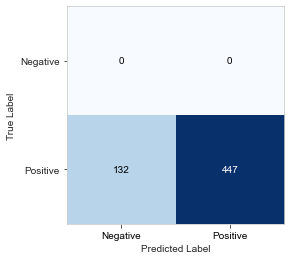

Accuracy of DecisionTreeClassifier is 0.918825561312608
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       139
           1       0.94      0.95      0.95       440

    accuracy                           0.92       579
   macro avg       0.89      0.88      0.89       579
weighted avg       0.92      0.92      0.92       579



<Figure size 432x288 with 0 Axes>

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

([<matplotlib.axis.XTick at 0x2b39df647f0>,
 [Text(0, 0, 'Negative'), Text(1, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x2b39df6d790>,
 [Text(0, 0, 'Negative'), Text(0, 1, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 432x288 with 0 Axes>

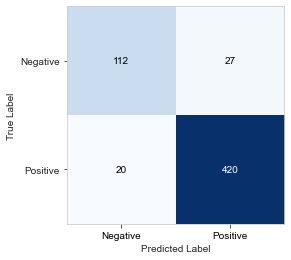

Accuracy of RandomForestClassifier is 0.918825561312608
              precision    recall  f1-score   support

           0       0.67      0.96      0.79        93
           1       0.99      0.91      0.95       486

    accuracy                           0.92       579
   macro avg       0.83      0.93      0.87       579
weighted avg       0.94      0.92      0.92       579



<Figure size 432x288 with 0 Axes>

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

([<matplotlib.axis.XTick at 0x2b3a00502b0>,
 [Text(0, 0, 'Negative'), Text(1, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x2b3a0050490>,
 [Text(0, 0, 'Negative'), Text(0, 1, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 432x288 with 0 Axes>

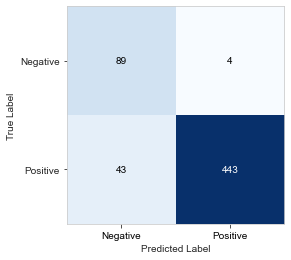

Accuracy of GradientBoostingClassifier is 0.9326424870466321
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       111
           1       0.98      0.94      0.96       468

    accuracy                           0.93       579
   macro avg       0.88      0.93      0.90       579
weighted avg       0.94      0.93      0.93       579



<Figure size 432x288 with 0 Axes>

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

([<matplotlib.axis.XTick at 0x2b3a00ab070>,
 [Text(0, 0, 'Negative'), Text(1, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x2b3a00b0130>,
 [Text(0, 0, 'Negative'), Text(0, 1, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 432x288 with 0 Axes>

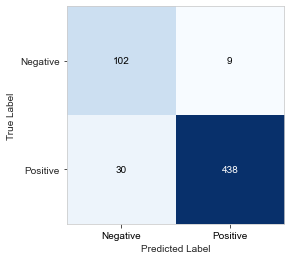

Accuracy of GaussianNB is 0.7858376511226253
              precision    recall  f1-score   support

           0       0.79      0.52      0.63       200
           1       0.79      0.93      0.85       379

    accuracy                           0.79       579
   macro avg       0.79      0.72      0.74       579
weighted avg       0.79      0.79      0.77       579



<Figure size 432x288 with 0 Axes>

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

([<matplotlib.axis.XTick at 0x2b3a00f2940>,
 [Text(0, 0, 'Negative'), Text(1, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x2b3a00fa8e0>,
 [Text(0, 0, 'Negative'), Text(0, 1, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 432x288 with 0 Axes>

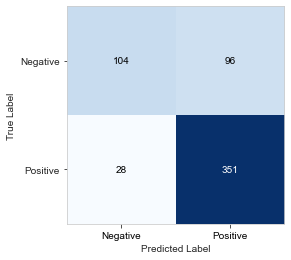

In [20]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for clf in Classifiers:
    try:
        fit = clf.fit(train_features,train['Polarity_type'])
        pred = fit.predict(test_features)
    except Exception:
        fit = clf.fit(dense_features,train['Polarity_type'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['Polarity_type'])
    Accuracy.append(accuracy)
    Model.append(clf.__class__.__name__)
    print('Accuracy of '+clf.__class__.__name__+' is '+str(accuracy)) 
    print(classification_report(pred,test['Polarity_type']))
    
    #Confusion Matrix
    cm = confusion_matrix(pred,test['Polarity_type'])
    plt.figure()
    plot_confusion_matrix(cm,cmap=plt.cm.Blues)
    plt.xticks(range(2), ['Negative','Positive'],color='black')
    plt.yticks(range(2), ['Negative','Positive'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

<BarContainer object of 5 artists>

([<matplotlib.axis.XTick at 0x2b39dd73b50>,
 [Text(0, 0, 'SVC'),
  Text(1, 0, 'DecisionTreeClassifier'),
  Text(2, 0, 'RandomForestClassifier'),
  Text(3, 0, 'GradientBoostingClassifier'),
  Text(4, 0, 'GaussianNB')])

Text(0, 0.5, 'Accuracy')

Text(0.5, 0, 'Model')

Text(0.5, 1.0, 'Classifier Accuracies')

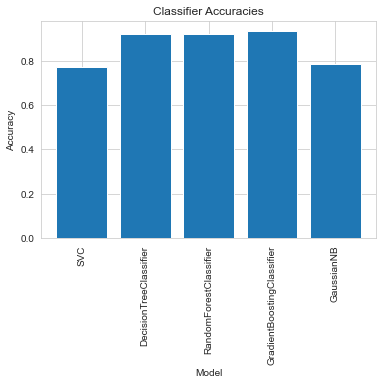

In [21]:
index=list(range(len(Classifiers)))
plt.bar(index,Accuracy)
plt.xticks(index,Model,rotation=90)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Classifier Accuracies')